## Isolation forest

Isolation Forest is a powerful algorithm for anomaly detection. It works by isolating data points using random splits and identifies points that are easier to isolate as anomalies. Let's break it down step by step and provide an example.

## How Isolation Forest Works
Isolation of Points:

- The algorithm randomly selects a feature and then randomly selects a split value between the minimum and maximum values of the selected feature.

- Points that require fewer splits to be isolated are considered anomalies because they lie in sparser regions of the feature space.

## Tree Construction:

- Isolation Forest constructs an ensemble of isolation trees. Each tree is constructed using a random subset of the training data.

- The depth of each tree corresponds to the number of splits required to isolate a point.

## Anomaly Scoring:

- The anomaly score for a data point is based on the average path length from the root to the point across all trees in the forest.

- Shorter average path lengths indicate anomalies.

## Real-World Analogy
Imagine you are in a forest where you want to find the rare trees (anomalies). You randomly pick a direction (feature) and walk a random distance before stopping (making a split). If you quickly come across a rare tree, it's likely an anomaly because it stands alone, far from other trees. On the other hand, common trees take longer to isolate because they are surrounded by many other trees.

In the context of the algorithm:

Random Direction and Distance: Randomly selecting features and split values.

Quick Isolation: Anomalies are isolated faster because they reside in sparse regions.

Ensemble of Trees: Multiple isolation paths (trees) increase the robustness of anomaly detection.

## How Are Anomaly Scores Calculated?
Anomaly scores are derived from the path lengths of data points:

Path Length: The path length of a data point is the number of edges traversed from the root of the tree to the leaf node where the point is isolated.

Average Path Length: The average path length is calculated across all trees in the forest.

Anomaly Score: The anomaly score is determined based on the average path length:

Shorter paths indicate anomalies (easier to isolate).

Longer paths indicate normal points (harder to isolate).

Anomaly score 
𝑠
(
𝑥
,
𝑛
)
 for a point 
𝑥
 in a dataset of size 
𝑛
 is given by: $$ s(x, n) = 2^{-\frac{E(h(x))}{c(n)}} $$ Where 
𝐸
(
ℎ
(
𝑥
)
)
 is the average path length, and 
𝑐
(
𝑛
)
 is the average path length of unsuccessful searches in a Binary Search Tree, approximated as: $$ c(n) = 2 \ln(n - 1) + \gamma - \frac{2(n - 1)}{n} $$ Here, 
𝛾
 is the Euler-Mascheroni constant (approximately 0.577).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs

# Generate synthetic data
X, _ = make_blobs(n_samples=100, centers=1, cluster_std=1.0, random_state=42)
# Add some outliers
X = np.vstack([X, np.random.uniform(low=-10, high=10, size=(10, 2))])

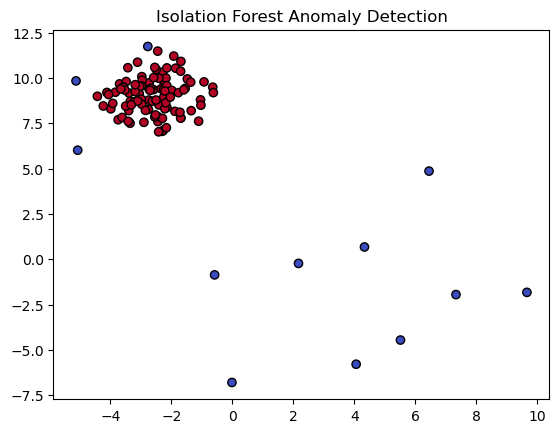

In [2]:
# Fit Isolation Forest
iso_forest = IsolationForest(random_state=42)
iso_forest.fit(X)

# Predict anomalies
anomalies = iso_forest.predict(X)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=anomalies, cmap='coolwarm', edgecolor='k')
plt.title("Isolation Forest Anomaly Detection")
plt.show()

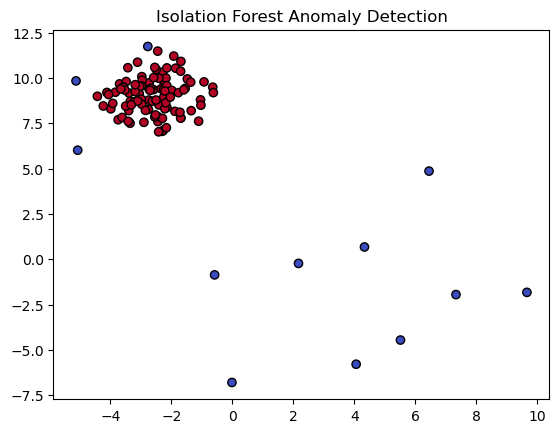

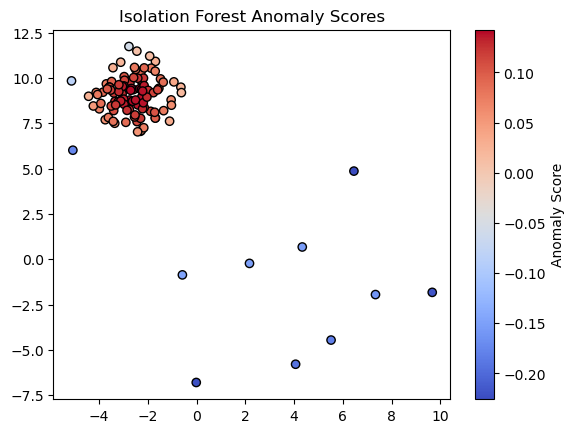

In [3]:
# Find anomaly scores
anomaly_scores = iso_forest.decision_function(X)

# Plot the data with anomalies highlighted
plt.scatter(X[:, 0], X[:, 1], c=anomalies, cmap='coolwarm', edgecolor='k')
plt.title("Isolation Forest Anomaly Detection")
plt.show()

# Plot anomaly scores
plt.scatter(X[:, 0], X[:, 1], c=anomaly_scores, cmap='coolwarm', edgecolor='k')
plt.colorbar(label='Anomaly Score')
plt.title("Isolation Forest Anomaly Scores")
plt.show()